In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/thieu1995/csv-files/main/data/text/email-spam/emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


([<matplotlib.patches.Wedge at 0x1370dfe50>,
 [Text(-0.750041288370007, 0.8046353619747644, 'Spam'),
  Text(0.7500412883700069, -0.8046353619747645, 'Not Spam')],
 [Text(-0.4091134300200038, 0.4388920156225987, '23.9%'),
  Text(0.4091134300200037, -0.4388920156225988, '76.1%')])

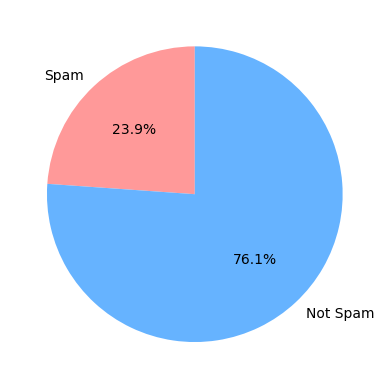

In [4]:
# Pie chart
labels = ['Spam', 'Not Spam']
sizes = [df['spam'].value_counts()[1], df['spam'].value_counts()[0]]
colors = ['#ff9999','#66b3ff']
fig1, ax1 = plt.subplots()

ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_raw = df['text']
y_raw = df['spam']

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

/Users/tripercy/miniconda3/envs/machine_learning_env/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train_raw)
X_test_counts = count_vect.transform(X_test_raw)

In [11]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [12]:
model_logreg = LogisticRegression()
model_logreg.fit(X_train_counts, y_train)
y_pred_logreg = model_logreg.predict(X_test_counts)

/Users/tripercy/miniconda3/envs/machine_learning_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

Accuracy: 0.9886561954624782


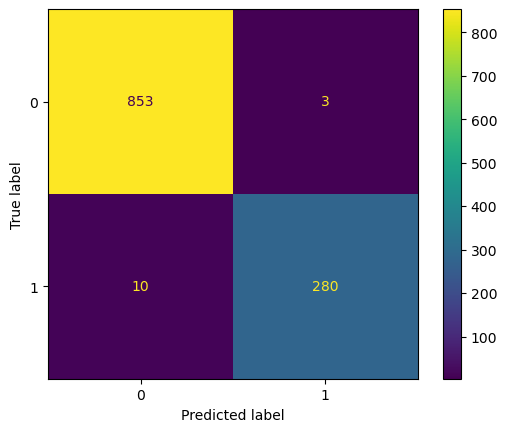

In [14]:
print('Accuracy:', accuracy_score(y_test, y_pred_logreg))
ConfusionMatrixDisplay.from_estimator(model_logreg, X_test_counts, y_test)